# _Code Session_ 9: Método de Euler

In [ ]:
import numpy as np, matplotlib.pyplot as plt

A integração numérica de uma EDO pode ser realizada em Python utilizando a função `solve_ivp` do módulo `scipy.integrate`.

## `solve_ivp`

Esta função resolve um problema de valor inicial (PVI) para uma EDO ou um sistema de EDOs. Por padrão, o método de resolução é um algoritmo de Runge-Kutta com precisão de 4a. ordem. 

Os argumentos de entrada obrigatórios desta função são: 

1. a função `f(t,y)` a ser integrada
2. o domínio de integração, definido como uma tupla `(t0,tf)`
3. a condição inicial `y0`

O principal argumento de saída é um objeto `sol`, em que:

- `sol.t`: retorna os valores do domínio
- `sol.y`: retorna os valores da solução numérica

In [22]:
from scipy.integrate import solve_ivp

**Exemplo:** Resolver numericamente o PVI

$$\begin{cases}
y'(t) = -2y(t)\\
y(0) = 1 \\
0 < t \le 3
\end{cases}$$

para $h=1.0,0.1,0.001$. 

Compare a solução numérica com a analítica: $y_{an}(t) = e^{-t^2}$. 

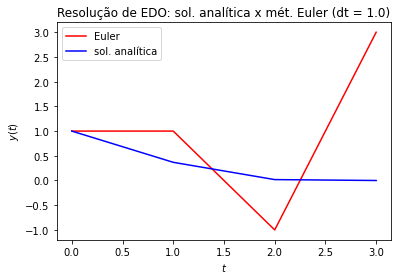

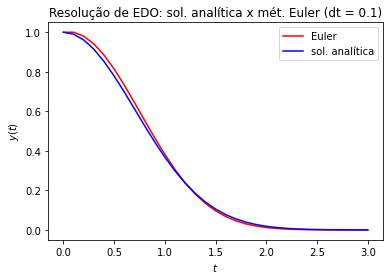

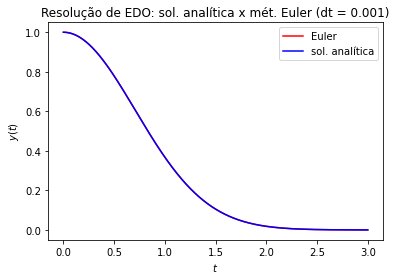

In [23]:
f = lambda t,y: -2*y*t
yan = lambda t: np.exp(-t**2)

y0 = 1
a = 0.0
b = 3.0
T = [1.0,0.1,0.001]

for k in T:
    
    t = np.arange(a, b+k, k)
    y = solve_ivp(f, (a,b), [y0])

    y2 = t*0
    y2[0] = y0
    dt = (b-a)/ (len(t)-1)
    for i in range(0,len(t)-1):
        y2[i+1] = y2[i] + f(t[i],y2[i])*dt
            
    fig = plt.figure()
    ax = fig.add_subplot(111)
    #plt.plot(t,y,'k',label='odeint')
    plt.plot(t,y2,'r',label='Euler')
    plt.plot(t,yan(t),'b',label='sol. analítica')
    plt.legend()
    s = 'Resolução de EDO: sol. analítica x mét. Euler (dt = ' + str(k) + ')' 
    plt.title(s)
    plt.xlabel('$t$') 
    plt.ylabel('$y(t)$')



**Exemplo:** Resolver numericamente o PVI

$$\begin{cases}
y'(t) = y+t\\
y(0) = 1 \\
0 < t \le 5
\end{cases}$$

para $h=1.0,0.1,0.001$. 

Compare a solução numérica com a analítica: $y_{an}(t) = 2e^{t} - t - 1$.

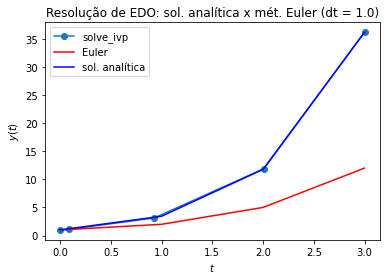

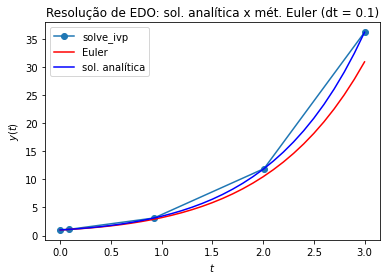

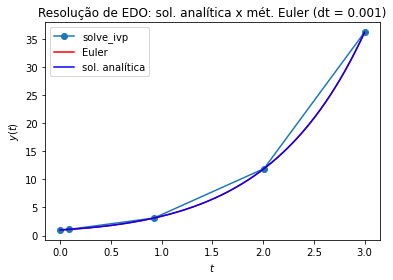

In [54]:
f = lambda t,y: y + t
yan = lambda t: 2*np.exp(t) - t - 1

y0 = 1
a = 0.0
b = 3.0
T = [1.0,0.1,0.001]

for k in T:
    
    t = np.arange(a, b+k, k)
    sol = solve_ivp(f, (a,b), [y0])

    y2 = t*0
    y2[0] = y0
    dt = (b-a)/ (len(t)-1)
    for i in range(0,len(t)-1):
        y2[i+1] = y2[i] + f(t[i],y2[i])*dt
            
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.plot(sol.t,sol.y[0],'o-',label='solve_ivp')
    plt.plot(t,y2,'r',label='Euler')
    plt.plot(t,yan(t),'b',label='sol. analítica')
    plt.legend()
    s = 'Resolução de EDO: sol. analítica x mét. Euler (dt = ' + str(k) + ')' 
    plt.title(s)
    plt.xlabel('$t$') 
    plt.ylabel('$y(t)$')



In [62]:
"""
%matplotlib inline 
from scipy.integrate import odeint
import numpy as np 
import matplotlib.pyplot as plt
from sympy import Symbol, integrate, sin, cos

# PVI 
# y' = f(T,y)
# y(t0) = 1, T = (t0,tn]

# parametros
t0 = 0
tn = 10
nt = 35
y0_ex2 = 1

# var. independente
T = np.linspace(t0,tn,nt)

# EDO
f_ex2 = lambda t,y: y**2*t*(np.sin(t))

# solucao analitica simbolica 
fun = 'y**2*t*(sin(t))'
tt = Symbol('t')
yan_ex2 = integrate(fun,(tt,t0,tn))
print(yan_ex2)

yan = yan_ex2.subs(t,T)

y_ex2 = solve_ivp(f_ex2, (t0,tn),[y0_ex2])

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(y_ex2.t,y_ex2.y[0],'k',label='solve_ivp')
plt.legend()
s = 'Resolução de EDO: sol. analítica x mét. Euler (dt = ' + str((tn-t0)/nt) + ')' 
plt.title(s)
plt.xlabel('$t$'); 
plt.ylabel('$y(t)$')
""";